# Figure - Data on violation with Sound rule


Current status:

- pulled processed data from the assess_dms_gnp_data.ipynb in dj_expoloratory_notebooks
- if I want to determine sa vs sb rule, will need to do some digging for each animal in stage 11 what they are doing
  - what is the delay (pre, delay, post)
  - what is the give? (give_type_imp) remove any guided sessions
  - what is the sound rule? Sa vs sb vs full
  - it is worth getting additional stages? e.g. R013 doing the full task
    - probably not- this isn't the point, but would be good to see if sa vs sb rule animals differ

This [table](https://docs.google.com/spreadsheets/d/1uGauAJ3PJTlj_0XlLNt4W4WnciQ-QbvexeeFBhaK2ds/edit?usp=sharing) will help with figuring out the sa/sb animals


In [16]:
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import config as c

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load


In [17]:
summary_df = pd.read_csv("data/DMStask_cleaned_summary_perf_df.csv")
summary_df.head()

,animal_id,dt_date,violations,hits,trial,pct_correct,pct_viol
0,R010,2023-10-22,0.051724,0.872727,58,87.272727,5.172414
1,R010,2023-10-23,0.051282,0.790541,156,79.054054,5.128205
2,R010,2023-10-24,0.066667,0.824675,165,82.467532,6.666667
3,R010,2023-10-25,0.060345,0.844037,116,84.403670,6.034483
4,R010,2023-10-26,0.021898,0.858209,138,85.820896,2.189781


In [18]:
print(f"Number of animals:  {summary_df.animal_id.nunique()}")
print(f"Number of sessions: {len(summary_df)}")
print(f"Number of trials:   {summary_df.trial.sum()}")

Number of animals:  13
Number of sessions: 179
Number of trials:   39028


In [19]:
days_to_target_df = pd.read_csv("data/DMStask_fixgrow_days_to_target.csv")

# Plot


,index,n_days_fix_target
0,median,6.000000
1,mean,6.615385
2,std,2.180920
3,size,13.000000
4,min,5.000000
5,max,12.000000


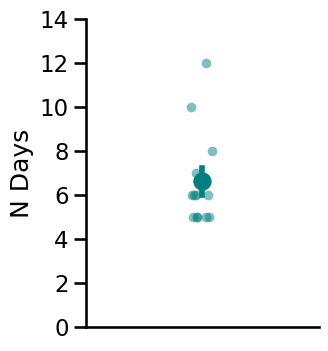

In [20]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.despine(ax=ax)
sns.pointplot(data=days_to_target_df, y="n_days_fix_target", color=c.SB_COLOR, ax=ax,zorder=10, errorbar="se")
sns.stripplot(data=days_to_target_df, y="n_days_fix_target", color=c.SB_COLOR, ax=ax, alpha=0.5, jitter=0.05, s=7)
ax.set(xlabel="", ylabel="N Days", ylim=(0,None))
ax.set(xticks=[])

stats = days_to_target_df['n_days_fix_target'].agg(['median', 'mean', 'std', 'size', 'min', 'max']).reset_index()
stats

ax.set_yticks(range(0, 15, 2))


c.save_fig(fig, "fig5_n_days_to_target.png")
stats


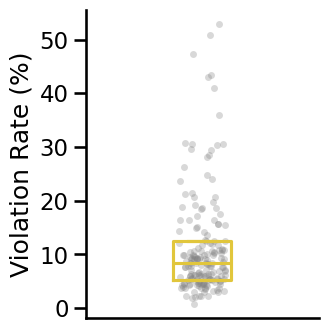

In [21]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.despine(ax=ax)
sns.boxplot(data=summary_df, y="pct_viol", color=c.VIOLATION_COLOR, ax=ax, showfliers=False, width=0.25, fill=False, whis=0, zorder=10)
sns.stripplot(data=summary_df, y="pct_viol", color="gray", ax=ax, alpha=0.3)
ax.set(xlabel="", ylabel="Violation Rate (%)")
ax.set(xticks=[])

stats = summary_df['pct_viol'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats

c.save_fig(fig, "fig5_viol_rate.png")


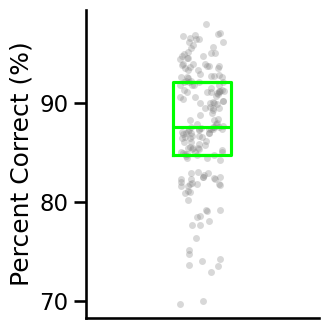

In [22]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.despine(ax=ax)
sns.boxplot(data=summary_df, y="pct_correct", color=c.HIT_COLOR, ax=ax, showfliers=False, width=0.25, fill=False, whis=0, zorder=10)
sns.stripplot(data=summary_df, y="pct_correct", color="gray", ax=ax, alpha=0.3)

ax.set(xlabel="", ylabel="Percent Correct (%)")
ax.set(xticks=[])

stats = summary_df['pct_correct'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats

c.save_fig(fig, "fig5_hit_rate.png")

,index,trial
0,median,209.000000
1,mean,218.033520
2,std,90.111286
3,size,179.000000


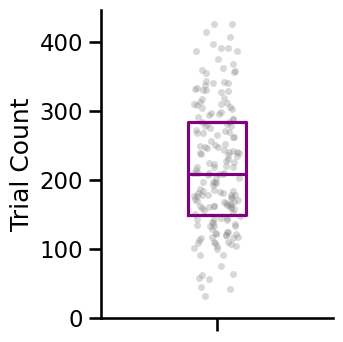

In [23]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.despine(ax=ax)
sns.boxplot(data=summary_df, y="trial", color=c.N_TRIAL_COLOR, ax=ax, showfliers=False, width=0.25, fill=False, whis=0, zorder=10)
sns.stripplot(data=summary_df, y="trial", color="gray", ax=ax, alpha=0.3)

ax.set(xlabel="", ylabel="Trial Count", ylim=(0, None))

stats = summary_df['trial'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats

[(70.0, 100.0), (0.0, 30.0)]

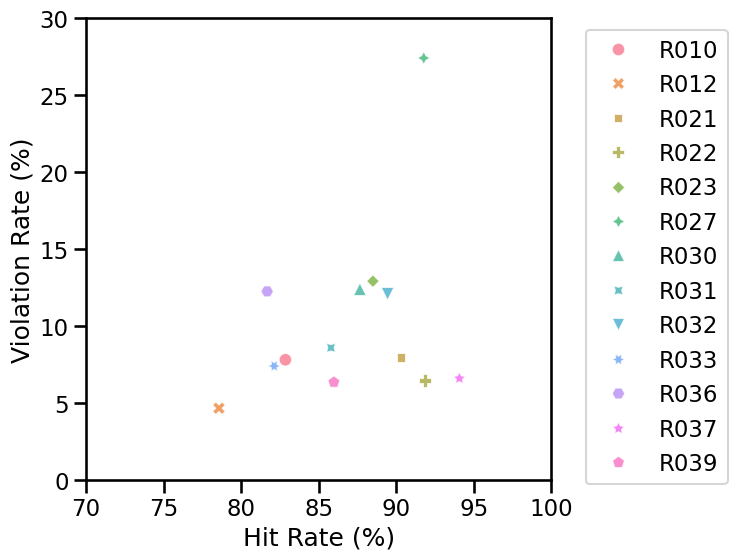

In [24]:
fig, ax = plt.subplots(figsize=(6,6))

animal_avg = summary_df.groupby('animal_id').agg({'pct_correct':'mean', 'pct_viol':'mean'}).reset_index()

sns.scatterplot(data=animal_avg, x='pct_correct', y='pct_viol', hue='animal_id', ax=ax, alpha=0.75, style='animal_id')
ax.set(xlabel="Hit Rate (%)", ylabel="Violation Rate (%)")

# legend to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set(xlim=(70, 100), ylim=(0, 30))



[(70.0, 100.0), (0.0, 30.0)]

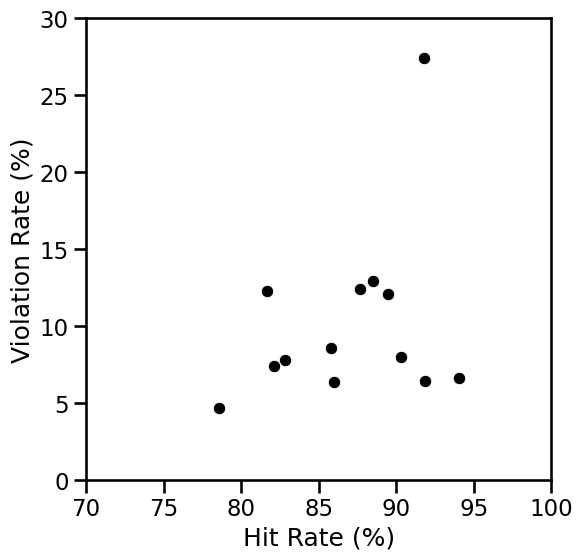

In [25]:
fig, ax = plt.subplots(figsize=(6,6))

animal_avg = summary_df.groupby('animal_id').agg({'pct_correct':'mean', 'pct_viol':'mean'}).reset_index()

sns.scatterplot(data=animal_avg, x='pct_correct', y='pct_viol', ax=ax, color="k")
ax.set(xlabel="Hit Rate (%)", ylabel="Violation Rate (%)")
ax.set(xlim=(70, 100), ylim=(0, 30))




Slope: 0.4112
Intercept: -25.5383
R²: 0.1070


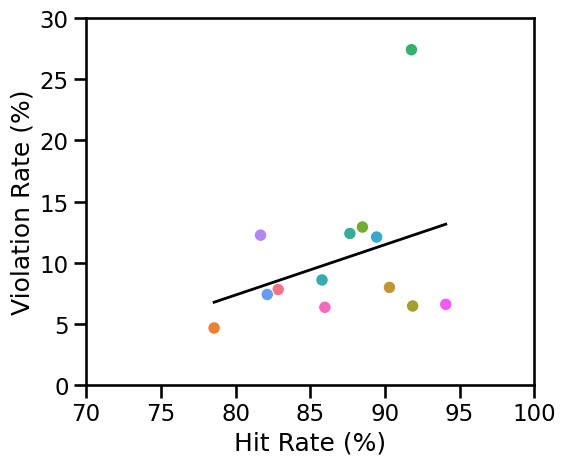

In [26]:
from scipy.stats import linregress

# 1. Compute per‐animal means
animal_avg = summary_df.groupby('animal_id') \
                       .agg({'pct_correct':'mean', 'pct_viol':'mean'}) \
                       .reset_index()

# 2. Do the linear regression
x = animal_avg['pct_correct']
y = animal_avg['pct_viol']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r2 = r_value**2

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r2:.4f}")

# 3. Prepare line for plotting
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = intercept + slope * x_vals

# 4. Plot scatter + regression line
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(data=animal_avg, x='pct_correct', y='pct_viol', ax=ax, color='k', hue="animal_id")

ax.legend().remove()

ax.plot(
    x_vals, y_vals,
    color='black', lw=2,
    label=(
        f"$R^2 = {r2:.2f}$"
    )
)

ax.set(
    xlabel="Hit Rate (%)",
    ylabel="Violation Rate (%)",
    xlim=(70, 100),
    ylim=(0, 30)
)
plt.tight_layout()
plt.show()